# Hackathon 1: descriptive statistics, estimation and bootstrapping

This project illustrates the course LEPL1109 with an industrial applications of statistics. You will analyse the performance of wind farms located in the Walloon Brabant near Beauvechain and in the high Fens, close to Elsenborn. Each wind farm exploits 8 wind turbines. The kinetic power, noted Pk, (in watt) of one wind turbine is calculated with the formula 

Pk (W) = 0.5 x Rho x S x V^3

Where 

S   : is the surface of the circle in square meters with a radius equal to the length of blades (32 m).
Rho : is the air density (“masse volumique”). We consider here an average value of 1.2 kg/m^3
V   : is the speed of wind in m/s.

According to the Betz limit, only 59.3% of the kinetic energy from wind can be used to spin the turbine and generate electricity. In reality, turbines cannot reach the Betz limit, and the efficiency is estimated to 42% of the kinetic power. One wind turbine generates an electric power Pe = 0.42 x Pk. 

The wind turbins are stopped if the wind speed is above 90 km/h.

The file “BeauvechainWind.csv” and “Elsenborn.csv” contains the average daily wind speeds, measured in km/h, at Beauvechain and  Elsenborn (source www. https://www.ecad.eu/)

FILE FORMAT (MISSING VALUE CODE IS -9999):
01-06 SOUID: Source identifier
08-15 DATE : Date YYYYMMDD
17-21 FG   : wind speed in km/h
23-27 Q_FG : Quality code for FG (0='valid'; 1='suspect'; 9='missing')


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Sacha Defrère (51621900)

Part. 2: Alexandre Pirot (53811900)

Part. 3: Thomas Hautier (80162000)

Part. 4: Bryce Burignat (35171700)

Part. 5: Mathéo Ketels (23782000)

Part. 6: Dylan Goffinet (08471900)


------------------------------------------------------------------------------------------------------
1.	Write a function computing the electric power capacity (in Mega Watts = 10^6 W), for the two wind farms using wind data from the 1/1/2017 to the 1/1/2021

•	Do not forget to set the production to zero if the wind speed is above 90 km/h. 

•	Take care to converts units.

•	Remove all days with missing data (error code 1 or 9) for Beauvechain or Elsenborn

------------------------------------------------------------------------------------------------------

In [1]:
from cmath import nan
import pandas as pd
from math import pi
import scipy.stats as sc
import numpy as np
import matplotlib.pyplot as plt

# Import and filter invalid data from Elsenborn
df1 = pd.read_csv("Elsenborn.csv")
df1.columns = [x.strip() for x in df1.columns]
df1 = df1.drop('SOUID', axis=1)
df1 = df1[ ( (df1['FG'] != -9999) & (df1['Q_FG'] == 0) ) & ( (df1['DATE'] >= 20170101) & (df1['DATE'] <= 20210101) ) ]
wind1 = df1['FG']
n1 = len(df1.index)

# Import and filter invalid data from Beauvechain
df2 = pd.read_csv("Beauvechain.csv")
df2.columns = [x.strip() for x in df2.columns]
df2 = df2.drop('SOUID', axis=1)
df2 = df2[(df2["FG"] != -9999) & (df2["Q_FG"] == 0) & (df2['DATE'] >= 20170101) & (df2['DATE'] <= 20210101) ]
wind2 = df2['FG']
n2= len(df2.index)

# Check than every used date is in both df, and check indexes
df1['DATE'] = df1['DATE'].transform(lambda x: x if x in df2['DATE'].to_list() else nan)
df1.dropna(inplace=True)
df1.reset_index(drop=True, inplace=True)

df2['DATE'] = df2['DATE'].transform(lambda x: x if x in df1['DATE'].to_list() else nan)
df2.dropna(inplace=True)
df2.reset_index(drop=True, inplace=True)


def electricPower(raw_vit): #returns electric power in MW
    vit = raw_vit/3.6

    #Pk (W) = 0.5 x Rho x S x V^3
    Pk = 0.5*1.2*(pi*(32**2))*(vit**3)
    
    #Pe = 0.42 x Pk
    Pe = 0.42*Pk
    return 8*(10**(-6))*Pe

def make_power(row):
    if row['FG'] > 90 : return 0
    return electricPower(row['FG'])
    
df1["POWER"] = df1.apply(lambda row : make_power(row), axis=1)
df2["POWER"] = df2.apply(lambda row : make_power(row), axis=1)

print("Total electric power produced at Elsenborn's farm between 01/01/2017 and 01/01/2021 [MW] : ", {df1["POWER"].sum()})
print("Total electric power produced at Beauvechain's farm between 01/01/2017 and 01/01/2021 [MW] : ", {df2["POWER"].sum()})




Total electric power produced at Elsenborn's farm between 01/01/2017 and 01/01/2021 [MW] :  {7989.294853189225}
Total electric power produced at Beauvechain's farm between 01/01/2017 and 01/01/2021 [MW] :  {18222.757796311707}


Step by step description of our manipulation :

1. Importing and filtering the data
    1. Importing it as a pandas dataframe from each CSV
    2. Dropping the SOUID column
    3. Selecting only the correct quality and wind speed values
2. Implementing the power formulas as functions
3. Adding a new "POWER" column to the dataframes, containing the power computed with the previously defined functions
4. Computing the sum for everyday between the mentionned dates, to get an idea of the total production

We can see that for the same amount of time and the same amount of wind turbines, the Beauvechain farm has produced more than twice the amount of energy the Elsenborn farm has.

It is also important to note that some data has been dropped due to not having a corresponding date in the other farm, besides the data dropped due to incorrect values.

------------------------------------------------------------------------------------------------------------------------

2.	Plot histograms and box plots of electric power capacity (MW) from the 1/1/2017 to the 1/1/2021 (both sites). 

------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Power capacity of Beauvechain')

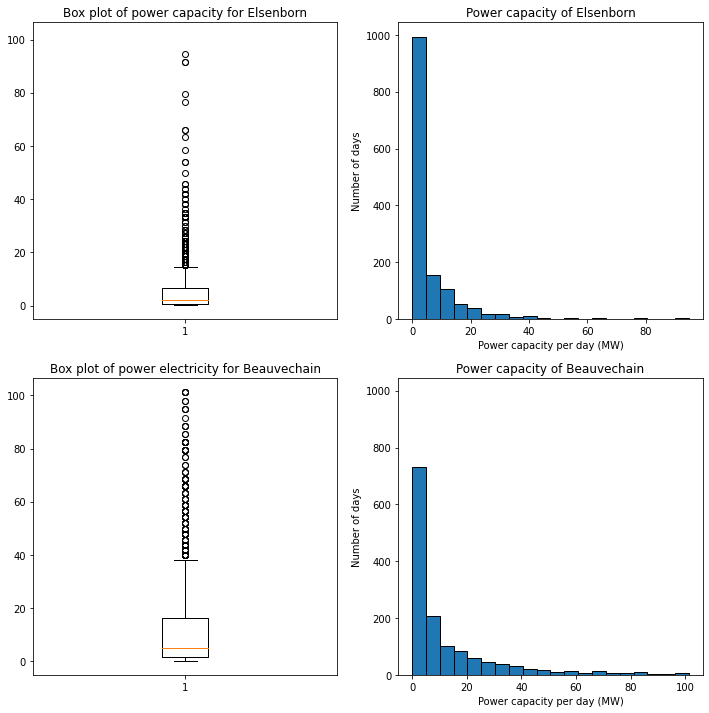

In [2]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharey='col')

# Dataset 1
axs[0][0].boxplot(df1["POWER"].values)
axs[0][0].set_title('Box plot of power capacity for Elsenborn')
axs[0][1].hist(df1["POWER"].values, bins=20, ec='k')
axs[0][1].set_xlabel('Power capacity per day (MW)')
axs[0][1].set_ylabel('Number of days')
axs[0][1].set_title('Power capacity of Elsenborn')

# Dataset 2
axs[1][0].boxplot(df2["POWER"].values)
axs[1][0].set_title('Box plot of power electricity for Beauvechain')
axs[1][1].hist(df2["POWER"].values, bins=20, ec='k')
axs[1][1].set_xlabel('Power capacity per day (MW)')
axs[1][1].set_ylabel('Number of days')
axs[1][1].set_title('Power capacity of Beauvechain')


------------------------------------------------------------------------------------------------------

3.	Compare the following statistics of both sites and draw a first conclusions

•	Average and median powers for each farm (MW)

•	Standard deviations of powers, for each farm (MW)

•	5% and 95% percentiles of powers, for each farm (MW)

The average and standard deviation of the total power capacities (Beauvechain + Elsenborn).

------------------------------------------------------------------------------------------------------

In [3]:
# Stats caracs
mean1 = df1["POWER"].mean()
mean2 = df2["POWER"].mean()
med1 = df1["POWER"].quantile(0.5)
med2 = df2["POWER"].quantile(0.5)
std1 = df1["POWER"].std()
std2 = df2["POWER"].std()
perc1_5 = df1["POWER"].quantile(0.05)
perc2_5 = df2["POWER"].quantile(0.05)
perc1_95 = df1["POWER"].quantile(0.95)
perc2_95 = df2["POWER"].quantile(0.95)

# SOMME POUR CHAQUE JOUR, puis .mean() et .std()
power_df = pd.concat([df1["POWER"], df2["POWER"]], keys=["P1", "P2"], axis=1)
power_df["TOTAL"] = power_df["P1"] + power_df["P2"]
mean = power_df["TOTAL"].mean()
std = power_df["TOTAL"].std()

print("POWER MEAN : \n" + "Elsenborn      " + str(mean1) + "\nBeauvechain    " + str(mean2) + "\nTOTAL          " + str(mean) + "\n")
print("POWER MEDIAN : \n" + "Elsenborn      " + str(med1) + "\nBeauvechain    " + str(med2) + "\n")
print("POWER STD : \n" + "Elsenborn      " + str(std1) + "\nBeauvechain    " + str(std2) + "\nTOTAL          " + str(std))
print("\nPOWER 5% percentile : \n" + "Elsenborn      " + str(perc1_5) + "\nBeauvechain    " + str(perc2_5))
print("\nPOWER 95% percentile : \n" + "Elsenborn      " + str(perc1_95) + "\nBeauvechain    " + str(perc2_95))

POWER MEAN : 
Elsenborn      5.650137802821234
Beauvechain    12.887381751281264
TOTAL          18.537519554102502

POWER MEDIAN : 
Elsenborn      1.9216158840261655
Beauvechain    4.995450667263333

POWER STD : 
Elsenborn      9.76546199330332
Beauvechain    18.436977517807893
TOTAL          25.03071516391243

POWER 5% percentile : 
Elsenborn      0.10133521263419236
Beauvechain    0.24020198550327068

POWER 95% percentile : 
Elsenborn      23.127086422515433
Beauvechain    54.0756109922025


Comment briefly your results



The mean and the median of the Beauvachain farm are both higher than those of the Elsenborn farm, indicating that the production in the former is greater than the one in the latter. However, the standard deviation in Beauvechain is also greater than the one in Elsenborn, showing that Elsenborn is a much more stable and consistent source of energy.


------------------------------------------------------------------------------------------------------
4.	Fit Gamma and Inverse Gaussian distributions to wind speeds (in Km/h) in Beauvechain and Elsenborn. Estimate their parameters by log-likelihood maximization (MLE). Which distribution is the best one? Compare the histograms of winds with the fitted pdf’s on the same plot.
------------------------------------------------------------------------------------------------------

In [9]:
# Code here, gamma distribution
def log_likelihood_gamma(data, alpha, loc, beta):
    ans = []
    for x in data:
        y = sc.gamma.pdf(x, a=alpha, loc=loc, scale=beta)
        ans.append(np.log(y))
    return np.sum(ans)

alpha1, locg1, beta1=sc.gamma.fit(df1["FG"])
alpha2, locg2, beta2=sc.gamma.fit(df2["FG"])

logL_gamma1 = log_likelihood_gamma(df1["FG"].values, alpha1, locg1, beta1)
logL_gamma2 = log_likelihood_gamma(df2["FG"].values, alpha2, locg2, beta2)

print("Log-likelihood of Gamma parameters obtained via MLE for Elsenborn :    ", logL_gamma1)
print("Log-likelihood of Gamma parameters obtained via MLE for Beauvechain :  ", logL_gamma2, "\n")

# Code here, inverse Gaussian distribution
mu1, loci1, scale1 = sc.invgauss.fit(df1["FG"])
mu2, loci2, scale2 = sc.invgauss.fit(df2["FG"])

def log_likelihood_invgauss(data, mu, loc, scale):
    ans = []
    for x in data:
        y = sc.gamma.pdf(x, mu, loc, scale)
        ans.append(np.log(y))
    return np.sum(ans)

logL_invgauss1 = log_likelihood_invgauss(df1["FG"].values, mu1, loci1, scale1)
logL_invgauss2 = log_likelihood_invgauss(df2["FG"].values, mu2, loci2, scale2)

print("Log-likelihood of Inv. Gaussian parameters obtained via MLE for Elsenborn :    ", logL_invgauss1)
print("Log-likelihood of Inv. Gaussian parameters obtained via MLE for Beauvechain :  ", logL_invgauss2)

Log-likelihood of Gamma parameters obtained via MLE for Elsenborn :     -5632.210141196076
Log-likelihood of Gamma parameters obtained via MLE for Beauvechain :   -6063.219839552392 

Log-likelihood of Inv. Gaussian parameters obtained via MLE for Elsenborn :     -5640.097291194509
Log-likelihood of Inv. Gaussian parameters obtained via MLE for Beauvechain :   -6069.737174527976


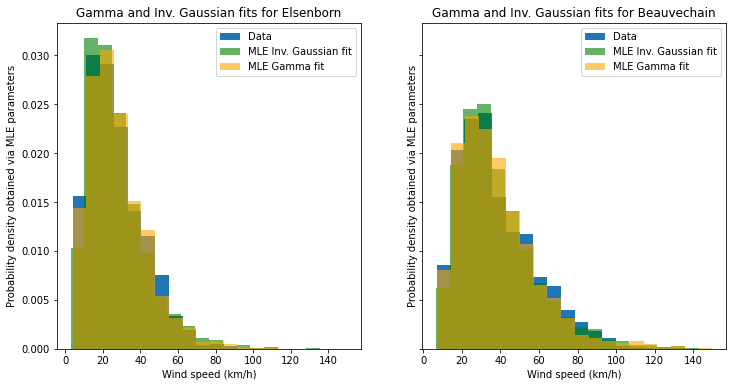

In [18]:
# Comparative Plots
wind_gamma1 = sc.gamma.rvs(alpha1, locg1, beta1, len(df1["FG"]))
wind_invgauss1 = sc.invgauss.rvs(mu1, loci1, scale1, len(df1["FG"]))
wind_gamma2 = sc.gamma.rvs(alpha2, locg2, beta2, len(df2["FG"]))
wind_invgauss2 = sc.invgauss.rvs(mu2, loci2, scale2, len(df2["FG"]))

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey='row')
axs[0].hist(df1["FG"].values, 20, range=(df1["FG"].values.min(), 150), label="Data", density=True)
axs[0].hist(wind_invgauss1, 20, range=(wind_invgauss1.min(), 150), alpha=0.6, label="MLE Inv. Gaussian fit", color="green", density=True)
axs[0].hist(wind_gamma1, 20, range=(wind_gamma1.min(), 150), alpha=0.6, label="MLE Gamma fit", color="orange", density=True)
axs[0].set_xlabel('Wind speed (km/h)')
axs[0].set_ylabel('Probability density obtained via MLE parameters')
axs[0].set_title('Gamma and Inv. Gaussian fits for Elsenborn')
axs[0].legend()

axs[1].hist(df2["FG"].values, 20, range=(df2["FG"].values.min(), 150), label="Data", density=True)
axs[1].hist(wind_invgauss2, 20, range=(wind_invgauss2.min(), 150), alpha=0.6, label="MLE Inv. Gaussian fit", color="green", density=True)
axs[1].hist(wind_gamma2, 20, range=(wind_gamma2.min(), 150), alpha=0.6, label="MLE Gamma fit", color="orange", density=True)
axs[1].set_xlabel('Wind speed (km/h)')
axs[1].set_ylabel('Probability density obtained via MLE parameters')
axs[1].set_title('Gamma and Inv. Gaussian fits for Beauvechain')
axs[1].legend()


We can see, by comparing the log-likelihood values (which are almost the same) and matching the histograms (which are similarly close to the original data), that the Gamma distribution and the Inverse Gaussian distribution are both very good fits for our data.
It is worth noting that the Gamma distribution may be a little better than the other one, since its log-likelihood values are higher, reason why it will be used as the best distribution later on.

------------------------------------------------------------------------------------------------------
5.	Compute numerically for both sites, the following statistics 

•	Expected and median powers for each farm (MW)

•	Standard deviation of powers for each farm (MW)

•	5% and 95% percentiles of powers for each farm (MW)

Use the best distributions fitted in Question 4 (not observed values)

------------------------------------------------------------------------------------------------------

In [14]:
# dataset1 (gamma)
gamma_mean1 = np.mean(df1["POWER"])
gamma_median1 = np.percentile(df1["POWER"], 50)
gamma_std1 = np.std(df1["POWER"])
gamma_perc1_5 = np.percentile(df1["POWER"], 5)
gamma_perc1_95 = np.percentile(df1["POWER"], 95)

# dataset2 (gamma)
gamma_mean2 = np.mean(df2["POWER"])
gamma_median2 = np.percentile(df2["POWER"], 50)
gamma_std2 = np.std(df2["POWER"])
gamma_perc2_5 = np.percentile(df2["POWER"], 5)
gamma_perc2_95 = np.percentile(df2["POWER"], 95)

# Prints
print(f"MEAN Elsenborn      : Data={mean1}\tVS\tGamma={gamma_mean1}")
print(f"MEDIAN Elsenborn    : Data={med1}\tVS\tGamma={gamma_median1}")
print(f"STD Elsenborn       : Data={std1}\tVS\tGamma={gamma_std1}")
print(f"PERC_5 Elsenborn    : Data={perc1_5}\tVS\tGamma={gamma_perc1_5}")
print(f"PERC_95 Elsenborn   : Data={perc1_95}\tVS\tGamma={gamma_perc1_95}\n")

print(f"MEAN Beauvechain    : Data={mean2}\tVS\tGamma={gamma_mean2})")
print(f"MEDIAN Beauvechain  : Data={med2}\tVS\tGamma={gamma_median2}")
print(f"STD Beauvechain     : Data={std2}\tVS\tGamma={gamma_std2}")
print(f"PERC_5 Beauvechain  : Data={perc2_5}\tVS\tGamma={gamma_perc2_5}")
print(f"PERC_95 Beauvechain : Data={perc2_95}\tVS\tGamma={gamma_perc2_95}")

MEAN Elsenborn      : Data=5.650137802821234	VS	Gamma=5.650137802821234
MEDIAN Elsenborn    : Data=1.9216158840261655	VS	Gamma=1.9216158840261655
STD Elsenborn       : Data=9.76546199330332	VS	Gamma=9.762008248900587
PERC_5 Elsenborn    : Data=0.10133521263419236	VS	Gamma=0.10133521263419236
PERC_95 Elsenborn   : Data=23.127086422515433	VS	Gamma=23.127086422515433

MEAN Beauvechain    : Data=12.887381751281264	VS	Gamma=12.887381751281264)
MEDIAN Beauvechain  : Data=4.995450667263333	VS	Gamma=4.995450667263333
STD Beauvechain     : Data=18.436977517807893	VS	Gamma=18.430456924317376
PERC_5 Beauvechain  : Data=0.24020198550327068	VS	Gamma=0.24020198550327068
PERC_95 Beauvechain : Data=54.0756109922025	VS	Gamma=54.0756109922025


We can see that the Gamma distribution produces values that are almost identical to the original data, the greatest difference being in the standard deviation of Beauvechain (65*10E-4).

------------------------------------------------------------------------------------------------------

6.	Same question as Q.4 but this time, you fit the best distribution by the methods of moments MM, (in Python). Compare parameter estimates and plot pdf’s obtained by MLE and MM for both wind farms.

------------------------------------------------------------------------------------------------------

Elsenborn   : MLE log-likelihood=-5632.210141196076	VS	MM log-likelihood=-5658.230166724467
Beauvechain : MLE log-likelihood=-6063.219839552392	VS	MM log-likelihood=-6085.804752729843


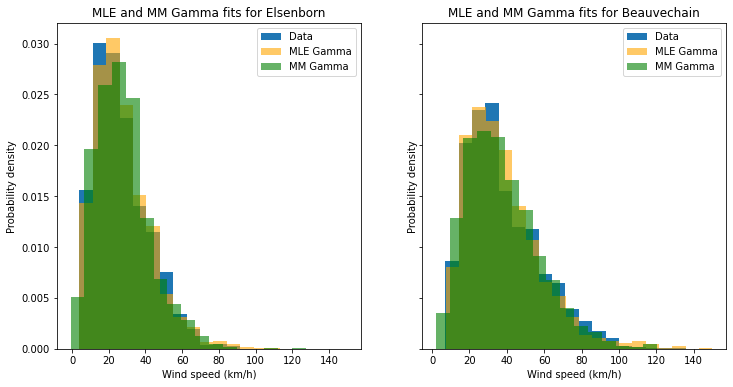

In [20]:
alpha1MM, loc1gMM, beta1MM = sc.gamma.fit(df1["FG"], method="MM")
alpha2MM, loc2gMM, beta2MM = sc.gamma.fit(df2["FG"], method="MM")

logL_gamma1MM = log_likelihood_gamma(df1["FG"].values, alpha1MM, loc1gMM, beta1MM)
logL_gamma2MM = log_likelihood_gamma(df2["FG"].values, alpha2MM, loc2gMM, beta2MM)

print(f"Elsenborn   : MLE log-likelihood={logL_gamma1}\tVS\tMM log-likelihood={logL_gamma1MM}")
print(f"Beauvechain : MLE log-likelihood={logL_gamma2}\tVS\tMM log-likelihood={logL_gamma2MM}")

wind_gamma1MM = sc.gamma.rvs(alpha1MM, loc1gMM, beta1MM, len(df1["FG"]))
wind_gamma2MM = sc.gamma.rvs(alpha2MM, loc2gMM, beta2MM, len(df2["FG"]))

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey='row')

axs[0].hist(df1["FG"].values, 20, range=(df1["FG"].values.min(), 150), label="Data", density=True)
axs[0].hist(wind_gamma1, 20, range=(wind_gamma1.min(), 150), alpha=0.6, label="MLE Gamma", color="orange", density=True)
axs[0].hist(wind_gamma1MM, 20, range=(wind_gamma1MM.min(), 150), alpha=0.6, label="MM Gamma", color="green", density=True)
axs[0].set_xlabel('Wind speed (km/h)')
axs[0].set_ylabel('Probability density')
axs[0].set_title('MLE and MM Gamma fits for Elsenborn')
axs[0].legend()

axs[1].hist(df2["FG"].values, 20, range=(df2["FG"].values.min(), 150), label="Data", density=True)
axs[1].hist(wind_gamma2, 20, range=(wind_gamma2.min(), 150), alpha=0.6, label="MLE Gamma", color="orange", density=True)
axs[1].hist(wind_gamma2MM, 20, range=(wind_gamma2MM.min(), 150), alpha=0.6, label="MM Gamma", color="green", density=True)
axs[1].set_xlabel('Wind speed (km/h)')
axs[1].set_ylabel('Probability density')
axs[1].set_title('MLE and MM Gamma fits for Beauvechain')
axs[1].legend()



We can see both in the log-likelihood values and by inspecting the histograms that for both farms, the MLE gives a better approximation of our data.

------------------------------------------------------------------------------------------------------

7.	Bootstrap 1000 times a sample of 500 daily speeds of wind for Beauvechain and compute a 5% confidence interval for parameter(s) estimates for the best distribution of Question 4) modelling winds in Beauvechain. How do you interpret the results

------------------------------------------------------------------------------------------------------

In [25]:
#Loading of the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import random as rn

wind_bootstrap = wind2[:500]
wind_bootstrap = np.array(wind_bootstrap) 
bet=[]
for _ in range (1000):
    datm = rn.choices(population=wind_bootstrap, k = 500)
    betm_alpha, betm_loc, betm_beta = sc.gamma.fit(data=datm, floc=0)
    bet.append(betm_beta)

quant_0_05    = np.quantile(bet,q=.05)
quant_0_95 = np.quantile(bet,q=.95)

#Printing of the desired values

print('.05 quantile :' + str(round(quant_0_05)))
print('.95 quantile :' + str(round(quant_0_95)))

C:\Users\sacha\AppData\Local\Temp/ipykernel_59688/4022527627.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  wind_bootstrap = wind2[:500]


.05 quantile :8
.95 quantile :10


Comment briefly your results



------------------------------------------------------------------------------------------------------

8.	Let us denote by X the wind speed observed at Beauvechain on a day of the year. The winds observed over 30 days are denoted by (X1,…,X30). They are realizations of X, a random variable with the distribution fitted in Question 4. If M=max{ X1,…,X30},  

•	find the statistical law of M (equation requested, hint use the cdf of X) 

•	plot the pdf and cdf of M. 

•	Determine the wind value, p5, such that  P(M>p5)=95%.


------------------------------------------------------------------------------------------------------

Comment briefly your results



In [ ]:
# M = max(X1, ..., X30)
# find statistical law of M (use cdf of X)
# plot the pdf and cdf of M
# determine the wind value, p5, such that P(M > p5) = 95%

